In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import display, clear_output

In [102]:
def E_particula(n):
    '''
    Definimos la energía de una partícula, dada por la energía del oscilador armónico cuántico
    esta es E = (n + 1/2) hbar * omega
    '''
    return (n + 1/2)

def E_Total(particulas):
    '''
    Definimos la energía total de un sistema de N partículas independientes
    '''
    for i in range(len(particulas)):
        E = E_particula(i)*particulas[i]
    return E

def metropolis(T, n_pasos, n_max = 1000):
    '''
    Definimos la función metropolis

    '''
    # Definimos el estado inicial, con un array de longitud n_max
    # con el número de partículas en cada estado originiralmente
    # el mismo en cada estado.
    estado = np.ones(n_max)*int(T**4/n_max)
    # Definimos la energía del estado inicial
    E = E_Total(estado)
    
    

    # Definimos el bucle para los pasos
    for i in range(n_pasos):
        # Definimos el estado propuesto, que es el estado actual
        # con una partícula cambiada de estado
        estado_propuesto = estado.copy()


        # Elegimos un estado inicial aleatorio que tiene que tener al menos una partícula
        p_propuesto = 0
        while p_propuesto < 1:
            n = np.random.randint(n_max)
            p_propuesto = estado_propuesto[n]
        # Elegimos un estado final aleatorio que tiene que tener al menos una partícula
        p_propuesto = 0
        while p_propuesto < 1:
            m = np.random.randint(n_max)
            p_propuesto = estado_propuesto[m]

        # Cambiamos una partícula del estado inicial al final
        estado_propuesto[n] -= 1
        estado_propuesto[m] += 1

        # Calculamos la energía del estado propuesto
        E_propuesto = E_Total(estado_propuesto)

        # Calculamos la diferencia de energía entre el estado propuesto y el actual
        dE = E_propuesto - E

        # Si la energía del estado propuesto es menor que la del estado actual
        # aceptamos el estado propuesto
        if dE < 0:
            estado = estado_propuesto
            E = E_propuesto

        # Si la energía del estado propuesto es mayor que la del estado actual
        # aceptamos el estado propuesto con una probabilidad dada por la distribución de Boltzmann
        else:
            p = np.exp(-dE/T)
            if np.random.rand() < p:
                estado = estado_propuesto
                E = E_propuesto

        
    # Devolvemos los estados, las energías y la energía promedio
    return estado

    

In [103]:

particulas = metropolis(10, 4000, n_max=1000)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(particulas)
plt.subplot(1,2,2)
plt.plot(lista_E)
plt.show()

KeyboardInterrupt: 

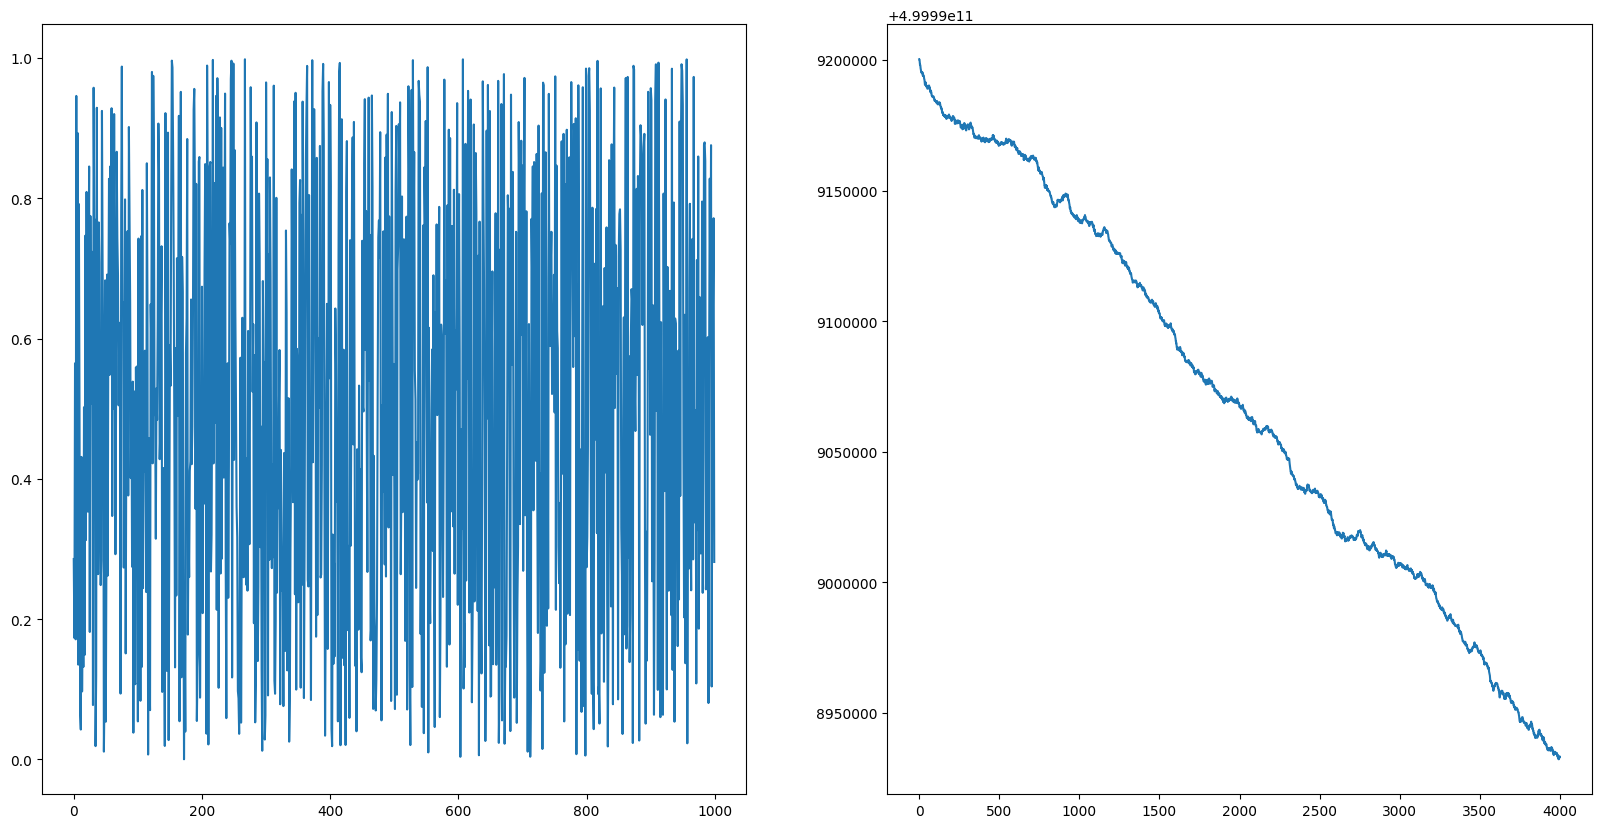

In [89]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(particulas[-1])
plt.subplot(1,2,2)
plt.plot(lista_E)
plt.show()

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>